In [21]:
import numpy as np
samples = ['The cat jump over the dog', 'The dog ate my homework']

#我们先将每个单词放置到一个哈希表中
token_index = {}
for sample in samples:
    #将一个句子分解成多个单词
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
print(token_index)
            
#设置句子的最大长度
max_length = 10
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
print(results.shape)
for i, sample in enumerate(samples):
    print("\nsentence", i+1)
    for j, word in list(enumerate(sample.split()))[: max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1.
        print("{0} -> {1}".format(word, results[i, j]))

{'The': 1, 'cat': 2, 'jump': 3, 'over': 4, 'the': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9}
(2, 10, 10)

sentence 1
The -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
cat -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
jump -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
over -> [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
the -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
dog -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

sentence 2
The -> [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
dog -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
ate -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
my -> [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
homework -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ['The cat jump over the dog', 'The dog ate my homework']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)
print(sequences)
one_hot_vecs = tokenizer.texts_to_matrix(samples, mode='binary')
print(one_hot_vecs)

word_index = tokenizer.word_index
print(word_index)

print("当前总共有%s个不同单词"%len(word_index))

[[1, 3, 4, 5, 1, 2], [1, 2, 6, 7, 8]]
[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
{'the': 1, 'dog': 2, 'cat': 3, 'jump': 4, 'over': 5, 'ate': 6, 'my': 7, 'homework': 8}
当前总共有8个不同单词


In [31]:
from tensorflow.keras.layers import Embedding
# 单词总数和单词维度
embedding_layer = Embedding(1000, 64)

In [44]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing

# 词典长10000
max_features = 10000
# 向量化前20个单词
max_len = 20

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# print(x_train)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [45]:
print(x_train[0])
print(x_train.shape)

[  65   16   38 1334   88   12   16  283    5   16 4472  113  103   32
   15   16 5345   19  178   32]
(25000, 20)


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
#在网络中添加Embedding层，专门用于把单词转换成向量
model.add(Embedding(10000, 8, input_length=max_len))

'''
我们给Embeding层输入长度不超过maxlen的单词向量，它为每个单词构造长度为8的向量
它会输出格式为(samples, maxlen, 8)的结果,然后我们把它转换为(samples, maxlen*8)的
二维格式
'''
model.add(Flatten())

#我们在顶部加一层只含有1个神经元的网络层，把Embedding层的输出结果对应成两个类别
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['acc'])
model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 2s 84us/sample - loss: 0.6820 - acc: 0.5882 - val_loss: 0.6549 - val_acc: 0.6700
Epoch 2/10
20000/20000 [==============================] - 1s 64us/sample - loss: 0.5830 - acc: 0.7380 - val_loss: 0.5526 - val_acc: 0.7190
Epoch 3/10
20000/20000 [==============================] - 1s 59us/sample - loss: 0.4812 - acc: 0.7835 - val_loss: 0.5095 - val_acc: 0.7368
Epoch 4/10
20000/20000 [==============================] - 1s 54us/sample - loss: 0.4269 - acc: 0.8131 - val_loss: 0.4967 - val_acc: 0.7482
Epoch 5/10
20000/20000 [==============================] - 1s 59us/sample - loss: 0.3918 - acc: 0.8288 - val_loss: 0.4960 - val_acc: 0.7524
Epoch 6/10
20000/20000 [==============================] - 1s 57us/sample - loss: 0.3646 - acc: 0.8446 - val_loss: 0.4976 - val_acc: 0.7526
Epoch 7/10
20000/20000 [==============================] - 1s 55us/sample - loss: 0.3412 - acc: 0.8573 - val_loss: 0.5

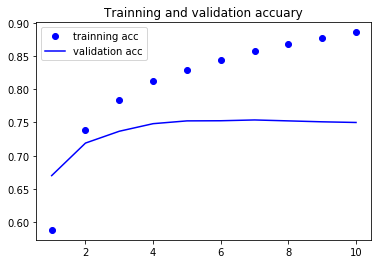

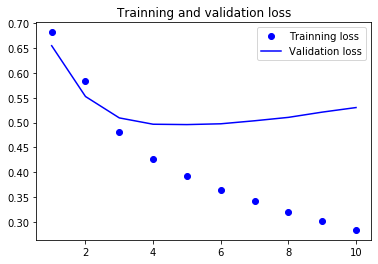

In [47]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#绘制模型对训练数据和校验数据判断的准确率
plt.plot(epochs, acc, 'bo', label = 'trainning acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('Trainning and validation accuary')
plt.legend()

plt.show()
plt.figure()

#绘制模型对训练数据和校验数据判断的错误率
plt.plot(epochs, loss, 'bo', label = 'Trainning loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Trainning and validation loss')
plt.legend()

plt.show()